In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.impute import SimpleImputer

In [53]:
data=pd.read_csv("müşteritkisi_Churn dataset.csv")
data.head()

,id,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,...,texniki dəstək,canli tv,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,"TelefonXidməti,KağızsızHesablaşma"
0,7590-VHVEG,Qadın,0,Hə,Yox,1,Yox,Teleon xidmeti yoxdur,DSL,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.85,29.85,Yox,Yox Hə
1,5575-GNVDE,Kişi,0,Yox,Yox,34,Hə,Yox,DSL,Hə,...,Yox,Yox,Yox,illik,Yox,mail cek,56.95,1889.5,Yox,Hə Yox
2,3668-QPYBK,Kişi,0,Yox,Yox,2,Hə,Yox,DSL,Hə,...,Yox,Yox,Yox,ayliq,Hə,mail cek,53.85,108.15,Hə,Hə Hə
3,7795-CFOCW,Kişi,0,Yox,Yox,45,Yox,Teleon xidmeti yoxdur,DSL,Hə,...,Hə,Yox,Yox,illik,Yox,bank transfer,42.30,1840.75,Yox,Yox Yox
4,9237-HQITU,NaN,0,Yox,Yox,2,Hə,Yox,Fiber optic,Yox,...,Yox,Yox,Yox,ayliq,Hə,elektronik cek,70.70,151.65,Hə,Hə Hə


In [54]:
print(data.columns)

Index(['id', 'cinsiyyət', 'Yaşlı təbəqə', 'tərəfdaş', 'asılı olanlar',
       'müddəti', 'Telefon Xidməti', 'Birdən çox xətt', 'İnternet servisi',
       'onlayn təhlükəsizlik', 'onlayn yedəkləmə', 'Cihazın Mühafizəsi',
       'texniki dəstək', 'canli tv', 'filmlər', 'müqavilə',
       'Kağızsız Hesablaşma', 'ödəniş metodu', 'Aylıq Ödənişlər',
       'Ümumi ödənişlər', 'Churn', 'TelefonXidməti,KağızsızHesablaşma'],
      dtype='object')


In [55]:
data.columns = data.columns.str.strip() 

In [56]:
print(data.columns)

Index(['id', 'cinsiyyət', 'Yaşlı təbəqə', 'tərəfdaş', 'asılı olanlar',
       'müddəti', 'Telefon Xidməti', 'Birdən çox xətt', 'İnternet servisi',
       'onlayn təhlükəsizlik', 'onlayn yedəkləmə', 'Cihazın Mühafizəsi',
       'texniki dəstək', 'canli tv', 'filmlər', 'müqavilə',
       'Kağızsız Hesablaşma', 'ödəniş metodu', 'Aylıq Ödənişlər',
       'Ümumi ödənişlər', 'Churn', 'TelefonXidməti,KağızsızHesablaşma'],
      dtype='object')


In [57]:
print("Shape:", data.shape)

Shape: (7043, 22)


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 7043 non-null   object 
 1   cinsiyyət                          6943 non-null   object 
 2   Yaşlı təbəqə                       7043 non-null   int64  
 3   tərəfdaş                           6943 non-null   object 
 4   asılı olanlar                      7043 non-null   object 
 5   müddəti                            7043 non-null   int64  
 6   Telefon Xidməti                    7043 non-null   object 
 7   Birdən çox xətt                    7043 non-null   object 
 8   İnternet servisi                   7043 non-null   object 
 9   onlayn təhlükəsizlik               7043 non-null   object 
 10  onlayn yedəkləmə                   7043 non-null   object 
 11  Cihazın Mühafizəsi                 7043 non-null   objec

In [59]:
# Missing Data
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(" Missing Values Percentage:\n", missing_percentage)

 Missing Values Percentage:
 id                                   0.000000
cinsiyyət                            1.419849
Yaşlı təbəqə                         0.000000
tərəfdaş                             1.419849
asılı olanlar                        0.000000
müddəti                              0.000000
Telefon Xidməti                      0.000000
Birdən çox xətt                      0.000000
İnternet servisi                     0.000000
onlayn təhlükəsizlik                 0.000000
onlayn yedəkləmə                     0.000000
Cihazın Mühafizəsi                   0.000000
texniki dəstək                       0.000000
canli tv                             0.000000
filmlər                              0.000000
müqavilə                             0.000000
Kağızsız Hesablaşma                  0.000000
ödəniş metodu                        0.000000
Aylıq Ödənişlər                      0.000000
Ümumi ödənişlər                      0.000000
Churn                                0.000000
Telef

In [60]:
#data.dropna(thresh = data.shape[1]*0.7, axis=1)
data = data.drop(data.columns[data.isnull().mean() > 0.7], axis=1)

In [61]:
print(data.columns)

Index(['id', 'cinsiyyət', 'Yaşlı təbəqə', 'tərəfdaş', 'asılı olanlar',
       'müddəti', 'Telefon Xidməti', 'Birdən çox xətt', 'İnternet servisi',
       'onlayn təhlükəsizlik', 'onlayn yedəkləmə', 'Cihazın Mühafizəsi',
       'texniki dəstək', 'canli tv', 'filmlər', 'müqavilə',
       'Kağızsız Hesablaşma', 'ödəniş metodu', 'Aylıq Ödənişlər',
       'Ümumi ödənişlər', 'Churn', 'TelefonXidməti,KağızsızHesablaşma'],
      dtype='object')


In [62]:
# data types
print("data types\n",data.dtypes)

data types
 id                                    object
cinsiyyət                             object
Yaşlı təbəqə                           int64
tərəfdaş                              object
asılı olanlar                         object
müddəti                                int64
Telefon Xidməti                       object
Birdən çox xətt                       object
İnternet servisi                      object
onlayn təhlükəsizlik                  object
onlayn yedəkləmə                      object
Cihazın Mühafizəsi                    object
texniki dəstək                        object
canli tv                              object
filmlər                               object
müqavilə                              object
Kağızsız Hesablaşma                   object
ödəniş metodu                         object
Aylıq Ödənişlər                      float64
Ümumi ödənişlər                       object
Churn                                 object
TelefonXidməti,KağızsızHesablaşma     objec

In [63]:
imputer = SimpleImputer(strategy="most_frequent")  
data["cinsiyyət"] = imputer.fit_transform(data[["cinsiyyət"]]).ravel()
data["cinsiyyət"].isnull().sum()


np.int64(0)

In [64]:
data["tərəfdaş"] = imputer.fit_transform(data[["tərəfdaş"]]).ravel()
data["tərəfdaş"].isnull().sum()

np.int64(0)

In [65]:
data["id"]=data["id"].astype(str)
print(data["id"].head())

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: id, dtype: object


In [66]:
print(type(data["id"][0]))  

<class 'str'>


In [67]:
print(data["Ümumi ödənişlər"])

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: Ümumi ödənişlər, Length: 7043, dtype: object


In [68]:
data["Ümumi ödənişlər"] = pd.to_numeric(data["Ümumi ödənişlər"], errors='coerce')
print(type(data["Ümumi ödənişlər"][0]))
# ->  If ‘raise’, then invalid parsing will raise an exception

# ->  If ‘coerce’, then invalid parsing will be set as NaN

# ->  If ‘ignore’, then invalid parsing will return the input

<class 'numpy.float64'>


In [69]:
imputer = SimpleImputer(strategy='mean')
data["Ümumi ödənişlər"] = imputer.fit_transform(data[["Ümumi ödənişlər"]])
print(data["Ümumi ödənişlər"].head())

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: Ümumi ödənişlər, dtype: float64


In [70]:
data['Churn'] = data['Churn'].astype('category')
print(data["Churn"])

0       Yox
1       Yox
2        Hə
3       Yox
4        Hə
       ... 
7038    Yox
7039    Yox
7040    Yox
7041     Hə
7042    Yox
Name: Churn, Length: 7043, dtype: category
Categories (2, object): ['Hə', 'Yox']


In [71]:
data['cinsiyyət'].value_counts()

cinsiyyət
Kişi     3608
Qadın    3435
Name: count, dtype: int64

<Axes: ylabel='cinsiyyət'>

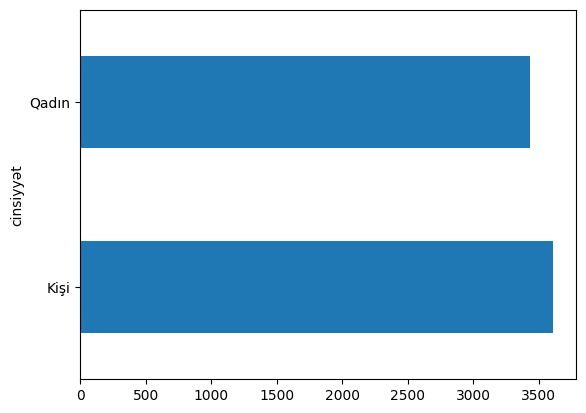

In [72]:
data['cinsiyyət'].value_counts().plot.barh()

In [73]:
data.groupby(["cinsiyyət"])["müqavilə"].value_counts()

cinsiyyət  müqavilə
Kişi       ayliq       1980
           2illik       864
           illik        764
Qadın      ayliq       1895
           2illik       831
           illik        709
Name: count, dtype: int64

In [74]:
print(data.columns)

Index(['id', 'cinsiyyət', 'Yaşlı təbəqə', 'tərəfdaş', 'asılı olanlar',
       'müddəti', 'Telefon Xidməti', 'Birdən çox xətt', 'İnternet servisi',
       'onlayn təhlükəsizlik', 'onlayn yedəkləmə', 'Cihazın Mühafizəsi',
       'texniki dəstək', 'canli tv', 'filmlər', 'müqavilə',
       'Kağızsız Hesablaşma', 'ödəniş metodu', 'Aylıq Ödənişlər',
       'Ümumi ödənişlər', 'Churn', 'TelefonXidməti,KağızsızHesablaşma'],
      dtype='object')


In [75]:
data['TelefonXidməti,KağızsızHesablaşma'].str.split(' ')

0        [Yox, Hə]
1        [Hə, Yox]
2         [Hə, Hə]
3       [Yox, Yox]
4         [Hə, Hə]
           ...    
7038      [Hə, Hə]
7039      [Hə, Hə]
7040     [Yox, Hə]
7041      [Hə, Hə]
7042      [Hə, Hə]
Name: TelefonXidməti,KağızsızHesablaşma, Length: 7043, dtype: object

In [76]:
data['TelefonXidməti'] = data['TelefonXidməti,KağızsızHesablaşma'].str.split(' ', expand=True)[0]

In [77]:
data['KağızsızHesablaşma']=data['TelefonXidməti,KağızsızHesablaşma'].str.split(' ', expand=True)[1]

In [78]:
data.drop(columns = ['TelefonXidməti,KağızsızHesablaşma'] , inplace=True)

In [79]:
print(data.columns)

Index(['id', 'cinsiyyət', 'Yaşlı təbəqə', 'tərəfdaş', 'asılı olanlar',
       'müddəti', 'Telefon Xidməti', 'Birdən çox xətt', 'İnternet servisi',
       'onlayn təhlükəsizlik', 'onlayn yedəkləmə', 'Cihazın Mühafizəsi',
       'texniki dəstək', 'canli tv', 'filmlər', 'müqavilə',
       'Kağızsız Hesablaşma', 'ödəniş metodu', 'Aylıq Ödənişlər',
       'Ümumi ödənişlər', 'Churn', 'TelefonXidməti', 'KağızsızHesablaşma'],
      dtype='object')


In [80]:
data.head()

,id,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,...,canli tv,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,TelefonXidməti,KağızsızHesablaşma
0,7590-VHVEG,Qadın,0,Hə,Yox,1,Yox,Teleon xidmeti yoxdur,DSL,Yox,...,Yox,Yox,ayliq,Hə,elektronik cek,29.85,29.85,Yox,Yox,Hə
1,5575-GNVDE,Kişi,0,Yox,Yox,34,Hə,Yox,DSL,Hə,...,Yox,Yox,illik,Yox,mail cek,56.95,1889.50,Yox,Hə,Yox
2,3668-QPYBK,Kişi,0,Yox,Yox,2,Hə,Yox,DSL,Hə,...,Yox,Yox,ayliq,Hə,mail cek,53.85,108.15,Hə,Hə,Hə
3,7795-CFOCW,Kişi,0,Yox,Yox,45,Yox,Teleon xidmeti yoxdur,DSL,Hə,...,Yox,Yox,illik,Yox,bank transfer,42.30,1840.75,Yox,Yox,Yox
4,9237-HQITU,Kişi,0,Yox,Yox,2,Hə,Yox,Fiber optic,Yox,...,Yox,Yox,ayliq,Hə,elektronik cek,70.70,151.65,Hə,Hə,Hə


In [81]:
data["Birdən çox xətt"].unique()

array(['Teleon xidmeti yoxdur', 'Yox', 'Hə'], dtype=object)

In [82]:
print(data['Birdən çox xətt'])

0       Teleon xidmeti yoxdur
1                         Yox
2                         Yox
3       Teleon xidmeti yoxdur
4                         Yox
                ...          
7038                       Hə
7039                       Hə
7040    Teleon xidmeti yoxdur
7041                       Hə
7042                      Yox
Name: Birdən çox xətt, Length: 7043, dtype: object


In [83]:
data['Birdən çox xətt']=data['Birdən çox xətt'].replace('Teleon xidmeti yoxdur', 'Yox')

In [84]:
print(data['Birdən çox xətt'])

0       Yox
1       Yox
2       Yox
3       Yox
4       Yox
       ... 
7038     Hə
7039     Hə
7040    Yox
7041     Hə
7042    Yox
Name: Birdən çox xətt, Length: 7043, dtype: object


In [85]:
filter_data= data[(data["Yaşlı təbəqə"]== 1) & (data['müddəti']> 2)]
print(filter_data[['Yaşlı təbəqə' , 'müddəti']])

      Yaşlı təbəqə  müddəti
30               1       71
50               1       43
52               1       25
53               1        8
54               1       60
...            ...      ...
7015             1       34
7023             1       63
7029             1        6
7031             1       55
7041             1        4

[1013 rows x 2 columns]


In [86]:
filter_data1 = data.loc[:99, ['cinsiyyət', 'Yaşlı təbəqə', 'tərəfdaş']] 		
print(filter_data1)

   cinsiyyət  Yaşlı təbəqə tərəfdaş
0      Qadın             0       Hə
1       Kişi             0      Yox
2       Kişi             0      Yox
3       Kişi             0      Yox
4       Kişi             0      Yox
..       ...           ...      ...
95     Qadın             0      Yox
96      Kişi             0       Hə
97      Kişi             0      Yox
98      Kişi             0      Yox
99     Qadın             1       Hə

[100 rows x 3 columns]


In [87]:
filter_data2 = data.iloc[:100, [1, 2, 3]]
print(filter_data2)

   cinsiyyət  Yaşlı təbəqə tərəfdaş
0      Qadın             0       Hə
1       Kişi             0      Yox
2       Kişi             0      Yox
3       Kişi             0      Yox
4       Kişi             0      Yox
..       ...           ...      ...
95     Qadın             0      Yox
96      Kişi             0       Hə
97      Kişi             0      Yox
98      Kişi             0      Yox
99     Qadın             1       Hə

[100 rows x 3 columns]


In [88]:
numerical_data=data.select_dtypes(include=["int64", "float64"])
print(numerical_data)

      Yaşlı təbəqə  müddəti  Aylıq Ödənişlər  Ümumi ödənişlər
0                0        1            29.85            29.85
1                0       34            56.95          1889.50
2                0        2            53.85           108.15
3                0       45            42.30          1840.75
4                0        2            70.70           151.65
...            ...      ...              ...              ...
7038             0       24            84.80          1990.50
7039             0       72           103.20          7362.90
7040             0       11            29.60           346.45
7041             1        4            74.40           306.60
7042             0       66           105.65          6844.50

[7043 rows x 4 columns]


In [89]:
numerical_data.corr()

,Yaşlı təbəqə,müddəti,Aylıq Ödənişlər,Ümumi ödənişlər
Yaşlı təbəqə,1.000000,0.016567,0.220173,0.102395
müddəti,0.016567,1.000000,0.247900,0.824757
Aylıq Ödənişlər,0.220173,0.247900,1.000000,0.650468
Ümumi ödənişlər,0.102395,0.824757,0.650468,1.000000


<Axes: >

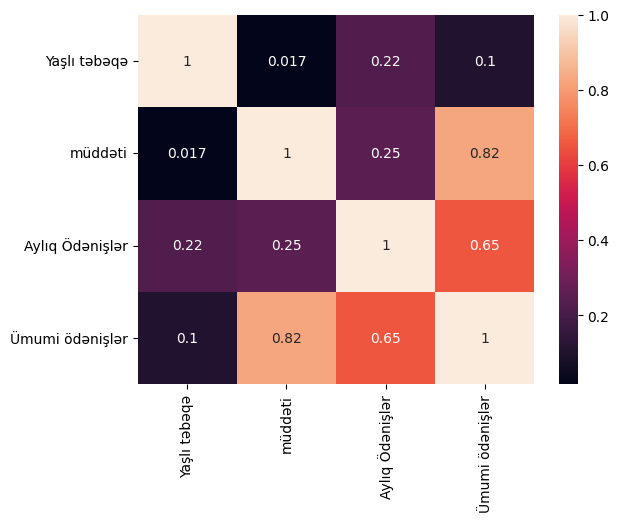

In [90]:
sns.heatmap(numerical_data.corr(method = 'pearson') , annot=True)

In [91]:
#numerical and categorical columns

numerical_data=data.select_dtypes(include=["int64", "float64"])
categorical_data=data.select_dtypes(include=['object', 'category'])

categoric_columns = data.select_dtypes(include=['object', 'category']).columns
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns
print("\nCategoric:\n", categoric_columns, "\nNumeric:\n", numeric_columns)


Categoric:
 Index(['id', 'cinsiyyət', 'tərəfdaş', 'asılı olanlar', 'Telefon Xidməti',
       'Birdən çox xətt', 'İnternet servisi', 'onlayn təhlükəsizlik',
       'onlayn yedəkləmə', 'Cihazın Mühafizəsi', 'texniki dəstək', 'canli tv',
       'filmlər', 'müqavilə', 'Kağızsız Hesablaşma', 'ödəniş metodu', 'Churn',
       'TelefonXidməti', 'KağızsızHesablaşma'],
      dtype='object') 
Numeric:
 Index(['Yaşlı təbəqə', 'müddəti', 'Aylıq Ödənişlər', 'Ümumi ödənişlər'], dtype='object')


In [92]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [93]:
label_encoders = {}
for col in categoric_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [94]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [95]:
x=data.drop(columns=["Ümumi ödənişlər"])
y=data["Ümumi ödənişlər"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  # train ve test-e ayırmaq

In [96]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [97]:
y_pred = model.predict(X_test)   # Proqnoz etmək

In [98]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2

mae_val = mae(y_test, y_pred)
mse_val = mse(y_test, y_pred)
rmse = np.sqrt(mse_val)
r2_val = r2(y_test, y_pred)

print(mae_val, mse_val, rmse, r2_val)


54.737534776437194 6764.950496470361 82.24931912466121 0.9986610238147295


In [99]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), 
                                   param_distributions=param_grid, 
                                   scoring='neg_mean_squared_error', 
                                   cv=5, random_state=0)  # 5 qatlı kross-validasiya

In [100]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=0, scoring='neg_mean_squared_error')

In [101]:
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mse(y_test, y_pred_best)

print(f"Optimallaşdırılmış model üçün Ortalama Kvadrat Xətası: {mse_best}")

Optimallaşdırılmış model üçün Ortalama Kvadrat Xətası: 6538.079668206043
